<a href="https://colab.research.google.com/github/ravichas/AMPL-Tutorial/blob/master/combine_data_step_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring and combining HTR3A protein target activity data from ExcapeDB and DTC databases. 

The Target specific data was downloaded from https://zenodo.org/record/173258#.X_44kuhKi70

Please refer to the ExCAPE-DB publication (https://pubmed.ncbi.nlm.nih.gov/28316655/) for details about the database 

Here are some details about HTR3A gene (taken from RefSeq NCBI)
*The product of this gene belongs to the ligand-gated ion channel receptor superfamily. This gene encodes subunit A of the type 3 receptor for 5-hydroxytryptamine (serotonin), a biogenic hormone that functions as a neurotransmitter, a hormone, and a mitogen. This receptor causes fast, depolarizing responses in neurons after activation. It appears that the heteromeric combination of A and B subunits is necessary to provide the full functional features of this receptor, since either subunit alone results in receptors with very low conductance and response amplitude. Alternatively spliced transcript variants encoding different isoforms have been identified.*

## Basic information about HTR3A gene:

**Present in** Chromosome 11
**Exon count:** 10

mRNA and protein information

*   NM_000869.6 → NP_000860.3 
*   NM_001161772.3 → NP_001155244.1
*   NM_213621.4 → NP_998786.3 








# Before you begin, make sure you close all other COLAB notebooks. 

# Change Runtime settings

## Plesae change your runtime settings to use GPU and high-memory, if you have 

## Runtime --> Change Runtime Type --> GPU wityh high-RAM

In [1]:
!date # starting time

Tue Apr  6 15:59:37 UTC 2021


## Install AMPL GPU version

```
real	2m59.739s
user	1m48.995s
sys	0m20.614s
```

## It will take less than 9 minutes for the AMPL install

In [2]:
%tensorflow_version 1.x

# get the Anaconda file 
! wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
! chmod +x Anaconda3-2019.10-Linux-x86_64.sh
! bash ./Anaconda3-2019.10-Linux-x86_64.sh -b -f -p /usr/local

! time conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
import deepchem as dc

# install mordred, bravado and molvs
! time conda install -c conda-forge -y mordred bravado molvs

# get the Install AMPL_GPU_test.sh
!wget https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU_test.sh

# run the script to install AMPL
! chmod u+x install_AMPL_GPU_test.sh
! ./install_AMPL_GPU_test.sh

TensorFlow 1.x selected.
--2021-04-06 15:59:37--  https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 530308481 (506M) [application/x-sh]
Saving to: ‘Anaconda3-2019.10-Linux-x86_64.sh’

Anaconda3-2019.10-L 100%[===================>] 505.74M   166MB/s    in 3.0s    

2021-04-06 15:59:40 (166 MB/s) - ‘Anaconda3-2019.10-Linux-x86_64.sh’ saved [530308481/530308481]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _ipyw_jlab_nb_ext_conf==0.1.0=py37_0
    - _libgcc_mutex==0.1=main
    - alabaster==0.7.12=py37_0
    - anaconda-client==1.7.2=py37_0
    - a

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.


InvalidVersionSpec: Invalid version '4.19.112+': empty version component


real	0m10.059s
user	0m7.415s
sys	0m1.558s
--2021-04-06 16:06:39--  https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU_test.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1100 (1.1K) [text/plain]
Saving to: ‘install_AMPL_GPU_test.sh’

install_AMPL_GPU_te 100%[===================>]   1.07

## Exploring target activity data from selected database
## Data source = ExcapeDB
## Target activity for the receptor HTR3A

In [3]:
! pip install umap
! pip install llvmlite==0.36.0 --ignore-installed
! pip install umap-learn==0.4.6
! pip install molvs
! pip install bravado

  Created wheel for umap: filename=umap-0.1.1-cp37-none-any.whl size=3568 sha256=577274be9025476536203fc40c0fd59fd9130148bb7d478d06df84adf4669896
  Stored in directory: /root/.cache/pip/wheels/7b/29/33/b4d917dc95f69c0a060e2ab012d95e15db9ed4cc0b94ccac26
Successfully built umap
     |████████████████████████████████| 25.3MB 1.8MB/s 
     |████████████████████████████████| 71kB 13.4MB/s 
     |████████████████████████████████| 2.2MB 22.5MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.4.6-cp37-none-any.whl size=67951 sha256=0d4f82a644a9f0c229da709c9e8ed56ef9a7a27640b8eef92fd0287ee40b6180
  Stored in directory: /root/.cache/pip/wheels/7d/1d/03/34aade9a9b97acddb8e93654eb856dadbf0964406eef8b96e2
  Created wheel for numba: filename=numba-0.53.1-cp37-cp37m-linux_x86_64.whl size=2972483 sha256=878deb22c17ffe45fb6964cbdf5da26b67bf7f7e2cfb2307c6552e06219cd4c9
  Stored in directory: /root/.cache/pip/wheels/18/73/6d/5efc968ed5dd12af56af988a03d81f84cc32dacefca2b1572f
Successfully built um

In [4]:
# There is a problem with the previously imported cffi, so delete it and 
# load it with AMPL instead
if 'cffi' in sys.modules:
  del sys.modules['cffi']

In [5]:
# We temporarily disable warnings for demonstration.
# FutureWarnings and DeprecationWarnings are present from some of the AMPL 
# dependency modules.
import warnings
warnings.filterwarnings('ignore')

import json
# import numpy as np
# import pandas as pd
import os
import requests

In [6]:
#
# Import AMPL libraries
# 
import atomsci.ddm.utils.data_curation_functions as dcf
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.pipeline.diversity_plots as dp
import atomsci.ddm.pipeline.chem_diversity as cd
# Additional python libraries
import pandas as pd
import numpy as np
import getpass,os

In [7]:
from matplotlib_venn import venn2
import getpass, os
import pandas as pd
import matplotlib.pyplot as plt
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.pipeline.chem_diversity as cd

## Select a target to work with 
### (e.g. PDE2A, KCNH2, SCNA5)

In [8]:
target_name='HTR3A'

In [9]:
import io
url2 = 'https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/datasets/HTR3A_excape_curated.csv'
download = requests.get(url2).content

# Reading the downloaded content and turning it into a pandas dataframe
d2_df = pd.read_csv(io.StringIO(download.decode('utf-8')), sep=',', header=0 )

url1 = 'https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/datasets/HTR3A_dtc_smiles_curated.csv'
download = requests.get(url1).content
# Reading the downloaded content and turning it into a pandas dataframe
d1_df = pd.read_csv(io.StringIO(download.decode('utf-8')), sep=',', header=0 )

In [10]:
# #get username so that people don't overwrite others work
# username = getpass.getuser()
# ## make sure there's a valid username
# assert username != ''
# val=os.getenv("USER")
# assert val == username

# #A local example
# input_dir='/Users/allen99/Documents/dev/AMPL/atomsci/ddm/examples/data_curation/'
# tmp_dir='/Users/allen99/Documents/dev/AMPL/atomsci/ddm/examples/data_curation/'

# #On Scholar site
# #input_dir='/class/datamine/corporate/llnl/ExcapeDB/'
# #tmp_dir='/class/datamine/corporate/llnl/DataCuration/tmp/'
# # make sure username is consistent
# #Final output will go in another directory
# #output_dir='/class/datamine/corporate/llnl/DataCuration/'

In [11]:
# d1_file = target_name+'_dtc_smiles_curated.csv'
# d2_file = target_name+'_excape_curated.csv'
# d1_df=pd.read_csv(d1_file)
# d2_df=pd.read_csv(d2_file)

In [12]:
d1a_df=d1_df.drop(columns=['relation'])
d1a_df.rename( columns={ "base_rdkit_smiles" : "rdkit_smiles" }, inplace=True)
print(d1a_df.columns)

Index(['compound_id', 'rdkit_smiles', 'PIC50', 'active'], dtype='object')


In [13]:
d2a_df=d2_df.drop(columns=['Original_Entry_ID', 'Entrez_ID','PXC50', 'DB', 
                           'Original_Assay_ID', 'Tax_ID', 'Gene_Symbol',
                           'VALUE_NUM_std', 'Perc_Var', 'Remove_BadDuplicate',
                           'Ortholog_Group', 'InChI', 'SMILES'])
d2a_df.rename( columns={ "Activity_Flag" : "active", "VALUE_NUM_mean": "PXC50" }, 
              inplace=True)


print(d2a_df.columns)

Index(['compound_id', 'active', 'rdkit_smiles', 'PXC50'], dtype='object')


In [14]:
d1a_df.rename( columns={"PIC50" : "PXC50"}, inplace = True)

In [15]:
d2a_df

,compound_id,active,rdkit_smiles,PXC50
0,ABIDZKZAFOTHFB-CCUGXXBONA-N,A,C[C@H]1COC[C@H](C)N1c1nc2c(C(=O)N[C@@H]3CN4CCC...,8.170000
1,ABSDJNLAUZQHJY-UHFFFAOYNA-N,A,COc1cccc(Sc2ccccc2N2CCNCC2)c1,7.210000
2,ACKJXXOVSOCBPX-PHLAQJRANA-N,A,Cc1c(N2CCN(C)CC2)nc2ccccc2c1C(=O)NCCCCCCCNc1c2...,8.250905
3,ADYMTDFOOCWUHC-UHFFFAOYNA-N,A,c1ccc(CCn2c(N3CCNCC3)nc3ccccc32)cc1,8.130000
4,AFLJKKMTBWNZFE-KAASGWQYNA-N,A,O=C(N[C@H]1CN2CCC1CC2)c1ccc2ccsc2c1,6.760000
...,...,...,...,...
591,ZTOYBNWVJQYBOX-KKBRQIQINA-N,A,CN1[C@H]2CCC[C@@H]1C[C@@H](NC(=O)c1cccc3oc(N4C...,7.140000
592,ZUFRPGFBOPXENO-UHFFFAOYNA-N,A,CC1CCC2=NC(=CCCCN3CCN(c4ccc5ccccc5n4)CC3)N(N)C...,7.320000
593,ZXDOWRQWHIUDFJ-ALLFDXPCNA-N,A,CN1[C@H]2CCC[C@@H]1CC(NC(=O)c1cccc3nc(-c4ccccc...,7.393620
594,ZXDOWRQWHIUDFJ-JJVVVXOKNA-N,A,CN1[C@H]2CCC[C@@H]1C[C@@H](NC(=O)c1cccc3nc(-c4...,7.390000


In [16]:
d1a_df

,compound_id,rdkit_smiles,PXC50,active
0,WLYLIKBNGQZDFH-UHFFFAOYSA-N,O=C(NCCCN1CCOCC1)c1ccc2c(=O)n(Cc3ccc(Cl)cc3)c(...,5.886057,0
1,PNHTUMMCJLWVTR-UHFFFAOYSA-N,COc1ccc(-c2cc(NC(=O)CCCCN3CCCOCC3)n[nH]2)cc1,4.522879,0
2,PYCJRTFNOGPLEL-UHFFFAOYSA-N,Nn1c(CCCCN2CCN(c3ccc4ccccc4n3)CC2)nc2cc(Cl)ccc...,7.000000,1
3,MMIPHEFKLSFNNB-MWGLOKQDSA-L,COc1ccc(C[N+]23CCC4C5C6C(CC42)C(=CCOC6N2c4cccc...,4.511439,0
4,PWVBQEUMVVPFJT-UHFFFAOYSA-N,Nn1c(CCCCN2CCN(c3ccc4ccccc4n3)CC2)nc2cc(F)ccc2...,7.000000,1
...,...,...,...,...
165,CZWQBSKNHUVZLI-UHFFFAOYSA-N,c1ccc(Cc2ncc3c(n2)CCNCC3)cc1,5.638272,0
166,QZHACJCMCCGZRU-UHFFFAOYSA-N,Cc1cc(N2CCN(CCCCc3nc4c(c(=O)n3N)CCCC4)CC2)nc2c...,7.228413,1
167,FALASSBEVXPICK-UHFFFAOYSA-N,CCCn1c(=O)[nH]c2cc(C(=O)NCCN3CCCCC3)ccc2c1=O,5.657577,0
168,YMGCQAHDDYCKLB-UHFFFAOYSA-N,CC1CCCCN1CCCNC(=O)c1ccc2c(=O)n(Cc3ccc(Cl)cc3)c...,4.935542,0


Text(0.5, 1.0, 'HTR3A')

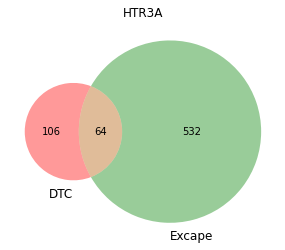

In [17]:
# Plot venn3 distribution 
d1_s = d1a_df['rdkit_smiles'].tolist()
d2_s = d2a_df['rdkit_smiles'].tolist()
#display(d1_s)
#display(d2_s)
dlst = [set(d1_s),set(d2_s)]

fig = plt.figure()
venn2(dlst, ('DTC', 'Excape'))
plt.title(target_name)
#fig.savefig('./plots/'+target_name+'_union_venn.png')
#fig

## Combine d1a_df and d2a_df dataframes 

In [18]:
comb_df=pd.concat([d1a_df, d2a_df])

In [19]:
comb_df.columns

Index(['compound_id', 'rdkit_smiles', 'PXC50', 'active'], dtype='object')

In [20]:
comb_df.head(5)

,compound_id,rdkit_smiles,PXC50,active
0,WLYLIKBNGQZDFH-UHFFFAOYSA-N,O=C(NCCCN1CCOCC1)c1ccc2c(=O)n(Cc3ccc(Cl)cc3)c(...,5.886057,0
1,PNHTUMMCJLWVTR-UHFFFAOYSA-N,COc1ccc(-c2cc(NC(=O)CCCCN3CCCOCC3)n[nH]2)cc1,4.522879,0
2,PYCJRTFNOGPLEL-UHFFFAOYSA-N,Nn1c(CCCCN2CCN(c3ccc4ccccc4n3)CC2)nc2cc(Cl)ccc...,7.000000,1
3,MMIPHEFKLSFNNB-MWGLOKQDSA-L,COc1ccc(C[N+]23CCC4C5C6C(CC42)C(=CCOC6N2c4cccc...,4.511439,0
4,PWVBQEUMVVPFJT-UHFFFAOYSA-N,Nn1c(CCCCN2CCN(c3ccc4ccccc4n3)CC2)nc2cc(F)ccc2...,7.000000,1


In [21]:
ofile=target_name+'_combine_curated.csv'

# column: Response values column
column = 'PXC50'

# tolerance: Percentage of individual respsonse values allowed to different 
# from the average to be included in averaging
tolerance = 10

# list_bad_duplicates: Print structures with bad duplicates
list_bad_duplicates = 'Yes'

# max_std: Maximum allowed standard deviation for computed average response value
# NOTE: In this example, we set this value very high to disable this feature
max_std = 1

# compound_id: Compound ID column
compound_id = 'compound_id'

# smiles_col: SMILES column
smiles_col = 'rdkit_smiles'

curated_df = curate_data.average_and_remove_duplicates(column, tolerance, 
                                                       list_bad_duplicates, 
                                                       comb_df, max_std, 
                                                       compound_id=compound_id, 
                                                       smiles_col=smiles_col)

Bad duplicates removed from dataset
Dataframe size (766, 8)
List of 'bad' duplicates removed
Empty DataFrame
Columns: [compound_id, PXC50, VALUE_NUM_mean, Perc_Var, VALUE_NUM_std]
Index: []

Dataset de-duplicated
Dataframe size (702, 8)
New column created with averaged values:  VALUE_NUM_mean


Post-processing dataset

Total Number of results = 702
dataset mean = 6.738187704369989 NM
dataset stdev = 1.5379201957059792 NM
dataset max = 10.5 NM
dataset min = 3.06 NM



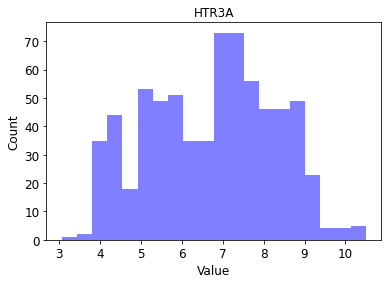

In [22]:
# Define the outcome column as PXC50
column = 'PXC50'

# # of 'bins' for the histogram
num_bins = 20

title = target_name

units = 'NM'

filepath = ""

data=curated_df

curate_data.summarize_data(column, num_bins, title, units, filepath, data)

In [23]:
feat_type='ECFP'
dist_metric='tanimoto'
union_s = curated_df['rdkit_smiles'].tolist()

smiles_lst1 = d1a_df['rdkit_smiles'].tolist()
smiles_lst2 = d2a_df['rdkit_smiles'].tolist()

## Have the dataset with more compounds be the point of reference

if len(smiles_lst1) > len(smiles_lst2) :
    s1,s2=smiles_lst1,smiles_lst2
else:
    s1,s2=smiles_lst2,smiles_lst1
calc_type='nearest'
num_nearest = 5
dist_sample=cd.calc_dist_smiles(feat_type, dist_metric, s1, s2, calc_type)

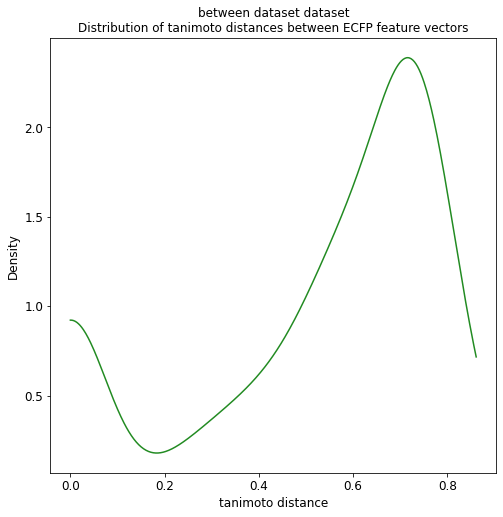

In [24]:
from scipy.stats.kde import gaussian_kde

import numpy as np
import matplotlib.pyplot as plt

odir='./'
task_name='between dataset'
dist_pdf = gaussian_kde(dist_sample)
x_plt = np.linspace(min(dist_sample), max(dist_sample), 500)
y_plt = dist_pdf(x_plt)    
fig, ax = plt.subplots(figsize=(8.0,8.0))
ax.plot(x_plt, y_plt, color='forestgreen')
ax.set_xlabel('%s distance' % dist_metric)
ax.set_ylabel('Density')
ax.set_title("%s dataset\nDistribution of %s distances between %s feature vectors" % (
              task_name, dist_metric, feat_type))
fig.savefig(odir+'distance_to_background_mol.png')

In [25]:
!date


Tue Apr  6 16:07:23 UTC 2021
